<a href="https://colab.research.google.com/github/IonutCiprian/BDA/blob/main/Twitter_Sentiment_Analysis_using_Python_%26_Pandas_in_Google_Colab_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
#Upload de fisier csv
from google.colab import files

uploaded = files.upload()

Saving Data.csv to Data.csv


In [185]:
import pandas as pd

# Încercați să citiți fișierul CSV cu diferite codificări
codificări = ['utf-8', 'latin1', 'ISO-8859-1']

for codificare in codificări:
    try:
        df = pd.read_csv("Data.csv", encoding=codificare)
        print(f"Fișierul CSV a fost citit cu succes cu codificarea: {codificare}")
        break  # Ieșiți din bucla dacă citirea a fost reușită
    except UnicodeDecodeError:
        print(f"Eșec la citire cu codificarea: {codificare}")

Eșec la citire cu codificarea: utf-8
Fișierul CSV a fost citit cu succes cu codificarea: latin1


In [186]:
#Afiseaza primele 2 randuri
df.head(2)


,textID,text,Time of Tweet,Age of User,Country,gender,Year
0,gz34s88a97,"Last year on this day, the late David Carr's w...",midnight,48,Spain,male,5/8/2017
1,qq94y62h57,"""How To Bring Art and Science to Managing a Co...",morning,50,Qatar,male,7/9/2017


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         20050 non-null  object
 1   text           20050 non-null  object
 2   Time of Tweet  20050 non-null  object
 3   Age of User    20050 non-null  int64 
 4   Country        20050 non-null  object
 5   gender         19953 non-null  object
 6   Year           20050 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


**Verificare lipsa date**

In [188]:
def check_missing(dataframe):
    return dataframe.isnull().sum()

missing_values = check_missing(df)
print(missing_values)

textID            0
text              0
Time of Tweet     0
Age of User       0
Country           0
gender           97
Year              0
dtype: int64


In [189]:
df.columns

Index(['textID', 'text', 'Time of Tweet', 'Age of User', 'Country', 'gender',
       'Year'],
      dtype='object')

In [190]:
print(df.dtypes)

textID           object
text             object
Time of Tweet    object
Age of User       int64
Country          object
gender           object
Year             object
dtype: object


In [167]:
print(df.columns)

Index(['textID', 'text', 'Time of Tweet', 'Age of User', 'Country', 'gender',
       'Year'],
      dtype='object')


In [193]:
#Afiseaza primele 100 randuri
df.head(100)

,textID,text,Time of Tweet,Age of User,Country,gender,Year
0,gz34s88a97,"Last year on this day, the late David Carr's w...",midnight,48,Spain,male,5/8/2017
1,qq94y62h57,"""How To Bring Art and Science to Managing a Co...",morning,50,Qatar,male,7/9/2017
2,sa26h32m70,@tchaten @iMuggle @app_factor Tim if you didn'...,morning,21,Italy,male,2/13/2018
3,ly47z92o77,Gorkle is a creature that smells hatred and sc...,afternoon,64,Saudi Arabia,male,9/7/2023
4,ki24s88j64,"""The Booze You Choose is Heavily Influenced by...",afternoon,55,Chile,male,5/23/2023
...,...,...,...,...,...,...,...
95,rd44t91f95,@smitten_kitten_ And it would probably be 15 b...,midnight,54,Algeria,male,4/16/2021
96,kl67g94z83,i think my purse may have demagnetized it. the...,miday,49,Canada,female,4/12/2020
97,ps78m19q40,Picked up Gabs at school and took her with me ...,afternoon,58,Bulgaria,male,1/14/2020
98,tx49y73z90,".@TheWeeknd tops the #Hot100 (again!), but wil...",midnight,50,Sweden,brand,10/17/2017


In [192]:
# Sortează după coloana "Age of User" în ordine descrescătoare
df_sorted = df.sort_values(by="Age of User", ascending=False)

# Afișează DataFrame-ul sortat
print(df_sorted)

           textID                                               text  \
10169  vi78q67m45            Happy g-day to the goat @HillaryClinton   
6831   dz35t35w83  it is part of Sydnex inc . And become a person...   
6841   zf73d32w28  Weren't Ross and Drake supposed to drop a join...   
6839   qk93q34o35  @paulwesleyshair @kennethtrujillo @50ShadesOfD...   
4306   ij45f16k67  @rona65 @RadGentleman the world would be a bet...   
...           ...                                                ...   
15651  yx52h11h19  #DidYouKnow Fareham gives its name to theåÊbor...   
9059   tc21h27c32  A class just for the beginners!  Men and women...   
9065   wu78e47d79  girl I'm not with you, you're not with me, and...   
1580   pg35m40c33  @JMV1070 also as a life long packers fan look ...   
10025  my89n39i33  I use to be so happy and cheerful during the b...   

      Time of Tweet  Age of User         Country  gender        Year  
10169       evening           65          Greece    male   7/16/

In [194]:
# Sortează după coloana "Year" în ordine descrescătoare
df_sorted = df.sort_values(by="Year", ascending=False)

# Afișează DataFrame-ul sortat
print(df_sorted)

           textID                                               text  \
2858   ec78t66s79  Former UNLV star Christian Wood made the Sixer...   
416    ef95i84w28  U.S. and Western Allies Demand U.N. Action Aga...   
3648   co52u68d43       Need a weekend get away just me and a lady..   
4495   gz32r33s85  @_ConnorM @SamBotty93 @meganhanxox her room ma...   
10929  vx22m49w18  @nkosinathi_d And He Will Never Put You In A S...   
...           ...                                                ...   
8775   ux37p86t79  Proud to be counted among the top employers in...   
6186   bt46r20w62  My mom just asked me what Netflix and chill meant   
16744  ww68p88j82  And you must love the Lord your God with all y...   
19220  vo93o69s45  EVERYDAYILOVEYOU Forevermore\n\nand what makes...   
18120  wt83r99z39  EM Rundown: Policymakers set the tone in China...   

      Time of Tweet  Age of User      Country  gender      Year  
2858      afternoon           65      Austria    male  9/9/2023  
416

In [202]:
# Aplică filtrele
filtered_data = df[(df["Age of User"] > 18) & (df["Country"] == "Germany")]

# Ordonează DataFrame-ul descrescător după coloana 'Year'
filtered_data_sorted = filtered_data.sort_values(by="Year", ascending=False)

# Afișează rezultatele
print(filtered_data_sorted)

           textID                                               text  \
16146  me16m46w84  Saw people on the TL complain about TWD this m...   
12046  gp78b22p14  @sadisticglitter How about I ask you and we ca...   
15689  nj67p30s71  Read 'Atlas Shrugged' before you vote. Documen...   
14067  ky85d56z64  Get Weather Updates from The Weather Channel. ...   
9519   zh15b34r91  @Valpakcoupons I heard pounding on the door an...   
...           ...                                                ...   
17500  bg47i21h62  Get Weather Updates from The Weather Channel. ...   
11347  zg12t88o89  According to the World Health Organization, ba...   
15144  uf50t63h30  US Navy to send a destroyer within 12 miles of...   
16042  cd37l93a31  @MinnySeminole and it was loud in there, espec...   
12808  nk77x50a46  FreshÏÓüpure styles with our True Love Lace...   

      Time of Tweet  Age of User  Country   gender       Year  
16146       morning           40  Germany   female   9/9/2020  
12046  

In [177]:
# Creare nouă coloană
df['NewColumn'] = 'Valoare implicită'  # Poți atribui o valoare implicită

# Afișează DataFrame-ul actualizat
print(df)

            0                                1         2   3      4     5  \
0  gz34s88a97         Last year on this day...  midnight  48  Spain  male   
1  qq94y62h57  How To Bring Art and Science...   morning  50  Qatar  male   

          6          NewColumn  
0  5/8/2017  Valoare implicită  
1  7/9/2017  Valoare implicită  


In [178]:
df = df.drop('NewColumn', axis=1)

**Analiza textului:**

In [203]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [205]:
# Analiza textului
df['text'] = df['text'].replace(np.nan, '', regex=True)

sentiment_scores = []
for text in df['text']:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df['Sentiment Score'] = sentiment_scores

In [206]:
# Clasificarea scorului
def get_sentiment_label(score):
  if score >= 0.01:
    return 'Positive'
  if score <= -0.01:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels



In [207]:
#Vizualizam cele 2 noi coloane
df.head(2)

,textID,text,Time of Tweet,Age of User,Country,gender,Year,Sentiment Score,Sentiment Label
0,gz34s88a97,"Last year on this day, the late David Carr's w...",midnight,48,Spain,male,5/8/2017,-0.34,Negative
1,qq94y62h57,"""How To Bring Art and Science to Managing a Co...",morning,50,Qatar,male,7/9/2017,0.00,Neutral


In [208]:
# Exemplu de creare și exportare a unui DataFrame
# Nu mai rulez ca il stric!!
import pandas as pd

# Salvare DataFrame într-un fișier CSV
df.to_csv('Data.csv', index=False)

# Descărcare fișier
from google.colab import files
files.download('Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [209]:
df.to_csv(r'C:\Users\Ionut\Desktop\CSV\Data.csv', index=False)

In [210]:
#Să ne uităm la distribuția de tweet-uri
temp = df.groupby('Sentiment Label').count()['text'].reset_index().sort_values(by='text', ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment Label,text
2,Positive,8429
1,Neutral,7101
0,Negative,4520


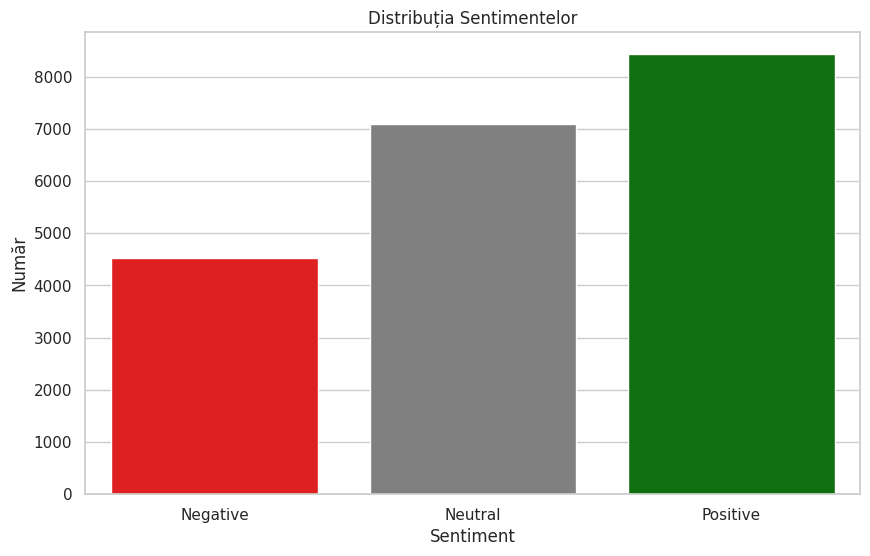

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Creează un count plot folosind Seaborn cu hue
sns.countplot(x='Sentiment Label', data=df, hue='Sentiment Label', palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}, legend=False)

# Setează titlul și etichetele pentru grafic
plt.title('Distribuția Sentimentelor')
plt.xlabel('Sentiment')
plt.ylabel('Număr')

# Afișează graficul
plt.show()

In [212]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnelarea(
    text=temp['Sentiment Label'],
    values=temp['text'],
    title={"position": "top center", "text": "Diagramă tip Funnel a Distribuției Sentimentelor"}
))

fig.show()

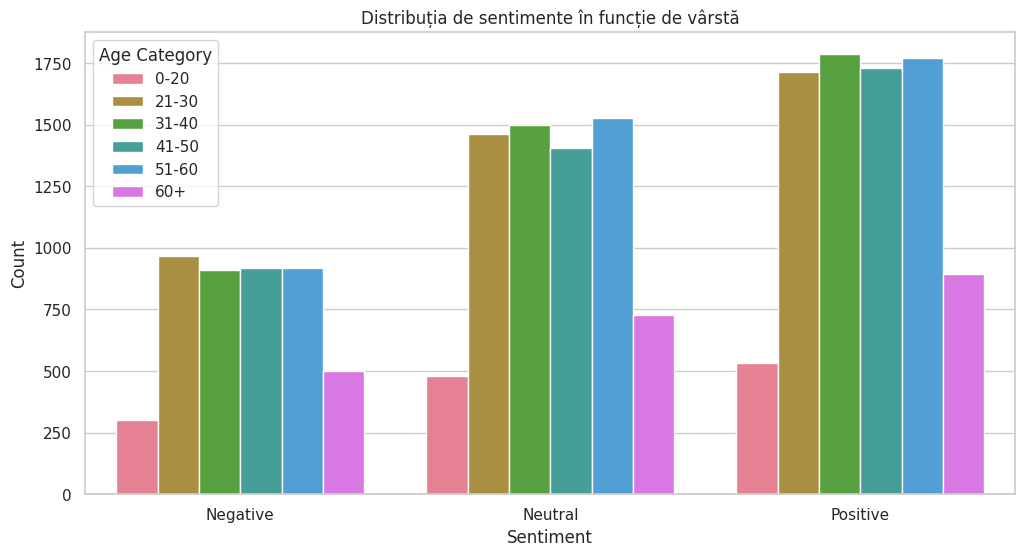

In [213]:
# Convertirea coloanei 'Age of User' în categorii
df['Age Category'] = pd.cut(df['Age of User'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Plotează histograma cu paleta de culori distinctă
plt.figure(figsize=(12, 6))
distinct_palette = sns.color_palette("husl", n_colors=len(df['Age Category'].unique()))
sns.countplot(x='Sentiment Label', data=df, hue='Age Category', palette=distinct_palette)
plt.title('Distribuția de sentimente în funcție de vârstă')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [214]:
import plotly.express as px

# Calculează distribuția valorilor în coloana 'Sentiment_Label'
sentiment_distribution = df['Sentiment Label'].value_counts().reset_index()

# Definește figura tip pie
fig = px.pie(sentiment_distribution, names='index', values='Sentiment Label',
             title='Distribuția de sentimente',
             labels={'index': 'Sentiment', 'Sentiment Label': 'Count'},
             hole=0.4)

# Adaugă numărul de observații pe fiecare sector al diagramei
fig.update_traces(textinfo='value+percent+label', pull=[0.1, 0.1, 0.1], textposition='inside')

# Afișează figura
fig.show()

In [215]:
import plotly.express as px

# Calculează distribuția valorilor în coloanele 'Sentiment_Label' și 'Country'
distribution_by_country = df['Country'].value_counts().reset_index(name='Count')

# Definește o paletă de culori distinctă pentru țări
distinct_palette = px.colors.qualitative.Set1

# Definește figura tip pie
fig = px.pie(distribution_by_country, names='index', values='Count',
             title='Distribuția de sentimente în funcție de țară',
             color='index',
             color_discrete_sequence=distinct_palette,  # Folosește paleta de culori distinctă
             labels={'index': 'Țară', 'Count': 'Număr'})

# Afișează figura
fig.show()

In [216]:
import plotly.express as px

# Calculează distribuția valorilor în coloanele 'Sentiment_Label' și 'Country'
distribution_by_country = df['Age of User'].value_counts().reset_index(name='Count')

# Definește o paletă de culori distinctă pentru țări
distinct_palette = px.colors.qualitative.Set1

# Definește figura tip pie
fig = px.pie(distribution_by_country, names='index', values='Count',
             title='Distribuția de sentimente în funcție de varstă',
             color='index',
             color_discrete_sequence=distinct_palette,  # Folosește paleta de culori distinctă
             labels={'index': 'Varsta', 'Count': 'Număr'})

# Afișează figura
fig.show()

In [217]:
import pandas as pd
df = pd.read_csv('Data.csv', encoding='latin-1')


# Gruparea după 'Country' și suma lungimii 'text' în fiecare grup
lungimi_text_pe_tara = df.groupby('Country')['text'].apply(lambda x: x.str.len().sum()).reset_index(name='Lungime_Totala_Text')

# Găsește țara cu cea mai mare lungime totală a textului
tara_cu_cel_mai_mult_text = lungimi_text_pe_tara.loc[lungimi_text_pe_tara['Lungime_Totala_Text'].idxmax()]

print(f"Țara cu cel mai mult text este: {tara_cu_cel_mai_mult_text['Country']} cu o lungime totală a textului de {tara_cu_cel_mai_mult_text['Lungime_Totala_Text']} caractere.")

Țara cu cel mai mult text este: Switzerland cu o lungime totală a textului de 39882 caractere.


**Primele 10 tari cu cel mai mult text**

In [218]:
import pandas as pd

# Citește fișierul CSV cu encoding 'latin-1'
df = pd.read_csv('Data.csv', encoding='latin-1')

# Afișează doar primele 10 țări
top_countries = df['Country'].value_counts().head(10).index

# Filtrare pentru a include doar aceste țări
df_top_countries = df[df['Country'].isin(top_countries)]

# Gruparea după 'Country' și suma lungimii 'text' în fiecare grup
lungimi_text_pe_tara = df_top_countries.groupby('Country')['text'].apply(lambda x: x.str.len().sum()).reset_index(name='Lungime_Totala_Text')

# Afișează rezultatele
print(lungimi_text_pe_tara)

                Country  Lungime_Totala_Text
0           Afghanistan                39173
1               Albania                37604
2               Denmark                37655
3               Ecuador                38422
4               Ireland                37859
5                 Qatar                38424
6                Serbia                38299
7           Switzerland                39882
8  United Arab Emirates                38176
9         United States                36400


**Vârsta cea mai activă **

In [219]:
import pandas as pd

# Citește fișierul CSV cu encoding 'latin-1'
df = pd.read_csv('Data.csv', encoding='latin-1')

# Gruparea după 'Age of User' și suma lungimii 'text' în fiecare grup
lungimi_text_pe_varsta = df.groupby('Age of User')['text'].apply(lambda x: x.str.len().sum()).reset_index(name='Lungime_Totala_Text')

# Găsește vârsta cu lungimea totală maximă a textului
varsta_max_activa = lungimi_text_pe_varsta.loc[lungimi_text_pe_varsta['Lungime_Totala_Text'].idxmax()]

# Afișează rezultatele
print("Vârsta cea mai activă este:", varsta_max_activa['Age of User'])
print("Lungimea totală a textului pentru această vârstă:", varsta_max_activa['Lungime_Totala_Text'])

Vârsta cea mai activă este: 54
Lungimea totală a textului pentru această vârstă: 45610


**Vârsta cea mai inactivă **

In [220]:
import pandas as pd

# Citește fișierul CSV cu encoding 'latin-1'
df = pd.read_csv('Data.csv', encoding='latin-1')

# Gruparea după 'Age of User' și suma lungimii 'text' în fiecare grup
lungimi_text_pe_varsta = df.groupby('Age of User')['text'].apply(lambda x: x.str.len().sum()).reset_index(name='Lungime_Totala_Text')

# Găsește vârsta cu lungimea totală minimă a textului
varsta_min_activa = lungimi_text_pe_varsta.loc[lungimi_text_pe_varsta['Lungime_Totala_Text'].idxmin()]

# Afișează rezultatele
print("Vârsta cea mai inactivă este:", varsta_min_activa['Age of User'])
print("Lungimea totală a textului pentru această vârstă:", varsta_min_activa['Lungime_Totala_Text'])

Vârsta cea mai inactivă este: 50
Lungimea totală a textului pentru această vârstă: 36352


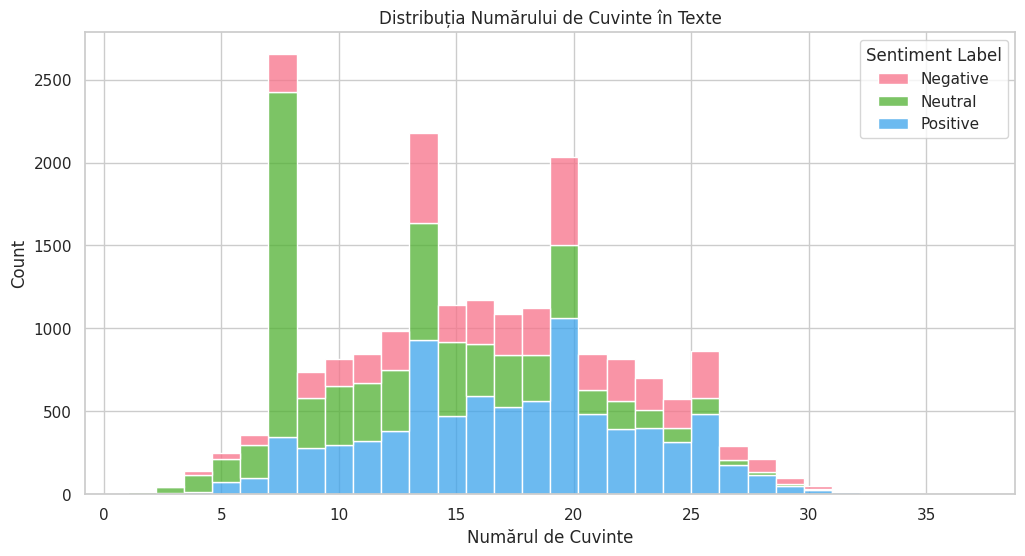

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adaugă o coloană pentru numărul de cuvinte în fiecare text
df['Word Count'] = df['text'].apply(lambda x: len(str(x).split()))

# Plotează o histogramă pentru distribuția numărului de cuvinte cu culori diferite pentru fiecare categorie de sentiment
plt.figure(figsize=(12, 6))
sns.histplot(x='Word Count', data=df, bins=30, hue='Sentiment Label', palette='husl', multiple='stack')
plt.title('Distribuția Numărului de Cuvinte în Texte')
plt.xlabel('Numărul de Cuvinte')
plt.ylabel('Count')
plt.show()

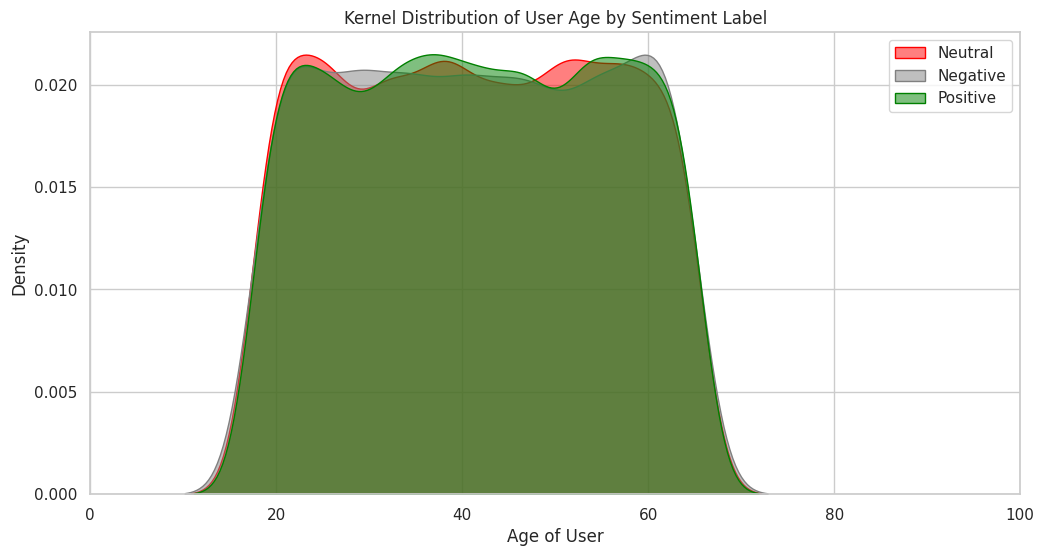

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creează un subconjunct de date pentru fiecare categorie de sentiment
neutral_data = df[df['Sentiment Label'] == 'Neutral']
negative_data = df[df['Sentiment Label'] == 'Negative']
positive_data = df[df['Sentiment Label'] == 'Positive']

# Setează stilul pentru plotare
sns.set(style="whitegrid")

# Creează un subplot cu o singură figură
plt.figure(figsize=(12, 6))

# Plotează distribuția de densitate a vârstei utilizatorilor pentru fiecare categorie de sentiment
sns.kdeplot(data=neutral_data, x='Age of User', fill=True, color='red', label='Neutral', alpha=0.5)
sns.kdeplot(data=negative_data, x='Age of User', fill=True, color='gray', label='Negative', alpha=0.5)
sns.kdeplot(data=positive_data, x='Age of User', fill=True, color='green', label='Positive', alpha=0.5)

# Adaugă titlul și etichetele pentru axe
plt.title('Kernel Distribution of User Age by Sentiment Label')
plt.xlabel('Age of User')
plt.ylabel('Density')

# Adaugă legenda pentru culori
plt.legend()

# Setează limita pentru axa x (vârsta)
plt.xlim(0, 100)

# Afișează plotul
plt.show()

In [ ]:
pip install nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


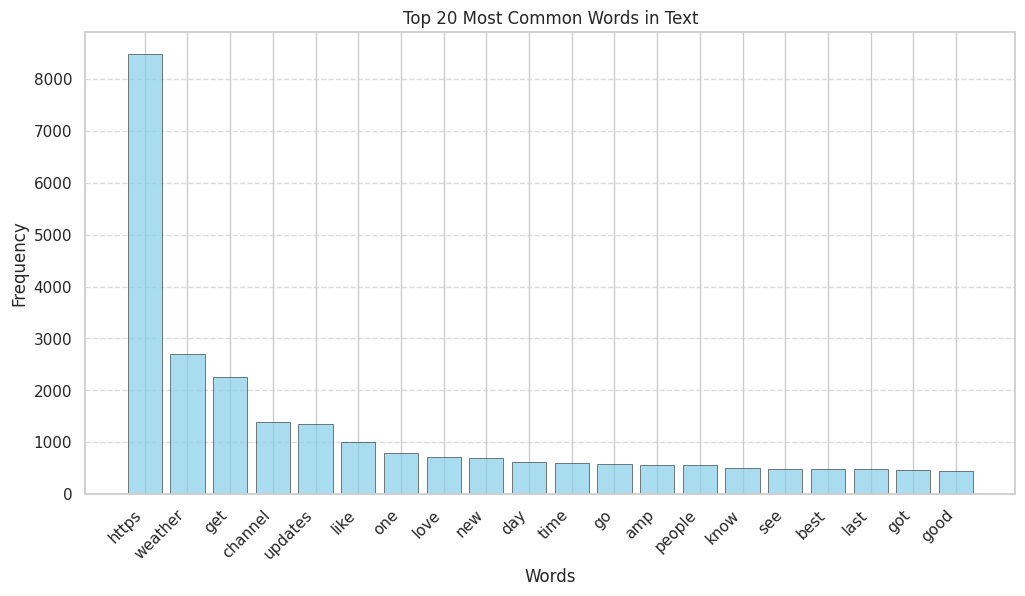

In [223]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Concatenează textul
text_data = ' '.join(df['text'])

# Tokenizează textul
words = word_tokenize(text_data)

# Elimină stop-words și cuvintele scurte
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and len(word) > 1]

# Calculează frecvența cuvintelor
freq_dist = FreqDist(filtered_words)

# Afișează cele mai frecvente 20 de cuvinte
plt.figure(figsize=(12, 6))
plt.bar(*zip(*freq_dist.most_common(20)), color='skyblue', edgecolor='black', linewidth=0.5, alpha=0.7)
plt.title('Top 20 Most Common Words in Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotirea etichetelor pe axa x pentru o mai bună vizibilitate
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Pentru cuvintele Comune**

In [224]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Creează o nouă coloană 'temp_list' în DataFrame-ul df, care conține liste de cuvinte pentru fiecare rând din 'text'
df['temp_list1'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Elimină stop-words și cuvintele scurte din 'temp_list'
df['temp_list1'] = df['temp_list1'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words and len(word) > 1])

# Calculează frecvența cuvintelor în 'temp_list'
top_words = Counter([item for sublist in df['temp_list1'] for item in sublist])

# Creează un DataFrame cu cele mai comune 20 de cuvinte
temp = pd.DataFrame(top_words.most_common(20), columns=['Common Words', 'count'])

# Afișează DataFrame-ul cu un gradient de culoare în stilul Blues
temp.style.background_gradient(cmap='PuRd')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Common Words,count
0,https,8477
1,weather,2708
2,get,2264
3,channel,1385
4,updates,1357
5,like,1004
6,one,791
7,love,715
8,new,700
9,day,614


In [225]:
import plotly.express as px

# Renumește coloana pentru a elimina spațiile
temp = temp.rename(columns={'Common_words': 'Common Words'})

# Crează un grafic de bare orizontal cu Plotly Express
fig = px.bar(temp, x="count", y="Common Words", title='Common Words in Selected Text', orientation='h',
             width=700, height=700, color='Common Words')

# Afișează graficul
fig.show()

In [226]:
import plotly.express as px

# Creează un treemap cu Plotly Express pentru cele mai comune cuvinte
fig_treemap = px.treemap(temp, path=['Common Words'], values='count', title='Treemap of Common Words',
                         color='count', color_continuous_scale='Viridis')

# Afișează treemap-ul
fig_treemap.show()

**Pentru cuvintele Positive**

In [227]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Creează o nouă coloană 'temp_list' în DataFrame-ul df, care conține liste de cuvinte pentru fiecare rând din 'text'
df['temp_list2'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Elimină stop-words și cuvintele scurte din 'temp_list'
df['temp_list2'] = df['temp_list2'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words and len(word) > 1])

# Filtrare pentru rândurile cu sentiment pozitiv
positive_df = df[df['Sentiment Label'] == 'Positive']

# Calculează frecvența cuvintelor pentru sentimentul pozitiv
top_positive = Counter([word for sublist in positive_df['temp_list2'] for word in sublist])

# Creează un DataFrame cu cele mai comune 20 de cuvinte pentru sentimentul pozitiv
temp_positive = pd.DataFrame(top_positive.most_common(20), columns=['Common_words', 'count'])

# Afișează DataFrame-ul cu un gradient de culoare în stilul Greens
temp_positive.style.background_gradient(cmap='Greens')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Common_words,count
0,https,3695
1,like,777
2,love,642
3,best,465
4,get,409
5,good,359
6,day,343
7,one,326
8,new,319
9,amp,301


In [228]:
import plotly.express as px

# Renumește coloana pentru a elimina spațiile
temp_positive = temp_positive.rename(columns={'Common_words': 'Common Words'})

# Crează un grafic de bare orizontal cu Plotly Express pentru cuvintele pozitive
fig_positive = px.bar(temp_positive, x="count", y="Common Words", title='Common Words in Positive Sentiment',
                      orientation='h', width=700, height=700, color='Common Words', color_continuous_scale='Greens')

# Afișează graficul pentru cuvintele pozitive
fig_positive.show()

In [229]:
import plotly.express as px

# Creează un treemap cu Plotly Express pentru cuvintele pozitive
fig_treemap_positive = px.treemap(temp_positive, path=['Common Words'], values='count',
                                   title='Treemap of Common Words in Positive Sentiment',
                                   color='count', color_continuous_scale='Greens')

# Afișează treemap-ul pentru cuvintele pozitive
fig_treemap_positive.show()

**Pentru cuvintele Negative**

In [230]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Creează o nouă coloană 'temp_list' în DataFrame-ul df, care conține liste de cuvinte pentru fiecare rând din 'text'
df['temp_list3'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Elimină stop-words și cuvintele scurte din 'temp_list'
df['temp_list3'] = df['temp_list3'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words and len(word) > 1])

# Filtrare pentru rândurile cu sentiment negativ
negative_df = df[df['Sentiment Label'] == 'Negative']

# Calculează frecvența cuvintelor pentru sentimentul negativ
top_negative = Counter([word for sublist in negative_df['temp_list3'] for word in sublist])

# Creează un DataFrame cu cele mai comune 20 de cuvinte pentru sentimentul negativ
temp_negative = pd.DataFrame(top_negative.most_common(20), columns=['Common_words', 'count'])

# Afișează DataFrame-ul cu un gradient de culoare în stilul Reds
temp_negative.style.background_gradient(cmap='Reds')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Common_words,count
0,https,1574
1,one,282
2,get,253
3,like,221
4,people,188
5,time,167
6,got,167
7,fuck,166
8,shit,162
9,want,150


In [231]:
import plotly.express as px

# Renumește coloana pentru a elimina spațiile
temp_negative = temp_negative.rename(columns={'Common_words': 'Common Words'})

# Crează un grafic de bare orizontal cu Plotly Express pentru cuvintele pozitive
fig_negative = px.bar(temp_negative, x="count", y="Common Words", title='Common Words in Negative Sentiment',
                      orientation='h', width=700, height=700, color='Common Words', color_continuous_scale='Greens')

# Afișează graficul pentru cuvintele pozitive
fig_negative.show()

In [232]:
import plotly.express as px

# Renumează coloana pentru a elimina spațiile
temp_negative = temp_negative.rename(columns={'Common_words': 'Common Words'})

# Crează un treemap cu Plotly Express pentru cuvintele negative
fig_treemap_negative = px.treemap(temp_negative, path=['Common Words'], values='count',
                                   title='Treemap of Common Negative Words',
                                   color='count', color_continuous_scale='Reds')

# Afișează treemap-ul pentru cuvintele negative
fig_treemap_negative.show()

**Pentru cuvintele Neutre**

In [233]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descarcă stop-words și tokenizatorul
nltk.download('stopwords')
nltk.download('punkt')

# Obține stop-words pentru limba engleză
stop_words = set(stopwords.words('english'))

# Creează o nouă coloană 'temp_list' în DataFrame-ul df, care conține liste de cuvinte pentru fiecare rând din 'text'
df['temp_list4'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Elimină stop-words și cuvintele scurte din 'temp_list'
df['temp_list4'] = df['temp_list4'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words and len(word) > 1])

# Filtrare pentru rândurile cu sentiment neutru
neutral_df = df[df['Sentiment Label'] == 'Neutral']

# Calculează frecvența cuvintelor pentru sentimentul neutru
top_neutral = Counter([word for sublist in neutral_df['temp_list4'] for word in sublist])

# Creează un DataFrame cu cele mai comune 20 de cuvinte pentru sentimentul neutru
temp_neutral = pd.DataFrame(top_neutral.most_common(20), columns=['Common_words', 'count'])

# Afișează DataFrame-ul cu un gradient de culoare în stilul Blues
temp_neutral.style.background_gradient(cmap='YlOrBr')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Common_words,count
0,https,3208
1,weather,2685
2,get,1602
3,channel,1349
4,updates,1347
5,last,272
6,new,247
7,makes,210
8,forevermore,204
9,pushawardslizquens,204


In [234]:
import plotly.express as px

# Renumește coloana pentru a elimina spațiile
temp_neutral = temp_neutral.rename(columns={'Common_words': 'Common Words'})

# Crează un grafic de bare orizontal cu Plotly Express pentru cuvintele pozitive
fig_neutral = px.bar(temp_neutral, x="count", y="Common Words", title='Common Words in Neutral Sentiment',
                      orientation='h', width=700, height=700, color='Common Words', color_continuous_scale='Greens')

# Afișează graficul pentru cuvintele pozitive
fig_neutral.show()

In [235]:
import plotly.express as px

# Renumește coloanele pentru a elimina spațiile
temp_neutral = temp_neutral.rename(columns={'Common_words': 'Common Words'})

# Creează un treemap cu Plotly Express pentru cuvintele neutre
fig_treemap_neutral = px.treemap(temp_neutral, path=['Common Words'], values='count',
                                   title='Treemap of Common Words in Neutral Sentiment',
                                   color='count', color_continuous_scale='YlOrBr')

# Afișează treemap-ul pentru cuvintele neutre
fig_treemap_neutral.show()

**Cele mai comune cuvinte**

In [237]:
from collections import Counter
import pandas as pd

# Funcție pentru a extrage cuvintele unice dintr-un text dat
def words_unique(sentiment, top_n, text_data):
    # Filtrare rânduri în funcție de sentiment
    sentiment_rows = df[df['Sentiment Label'] == sentiment]

    # Creare listă cuvinte pentru fiecare text
    words_list = [word for sublist in sentiment_rows[text_data].apply(lambda x: str(x).split()) for word in sublist]

    # Calcul frecvență cuvinte
    top_words = Counter(words_list)

    # Creare DataFrame cu cele mai comune top_n cuvinte
    top_df = pd.DataFrame(top_words.most_common(top_n), columns=['Common_words', 'count'])

    return top_df

# Apelare funcție pentru cele mai comune 20 de cuvinte unice în textele pozitive
unique_positive = words_unique('Positive', 20, 'text')
print("Cele mai comune 20 de cuvinte unice în textele pozitive sunt:")
print(unique_positive)

Cele mai comune 20 de cuvinte unice în textele pozitive sunt:
   Common_words  count
0           the   5548
1           and   5423
2            to   2971
3             I   2389
4             a   2137
5            of   1836
6           for   1828
7           you   1773
8            in   1508
9            is   1327
10           my    978
11           on    965
12          The    829
13         with    822
14           it    771
15         that    711
16         your    707
17           me    702
18         like    697
19           be    692


In [ ]:
pip install palettable

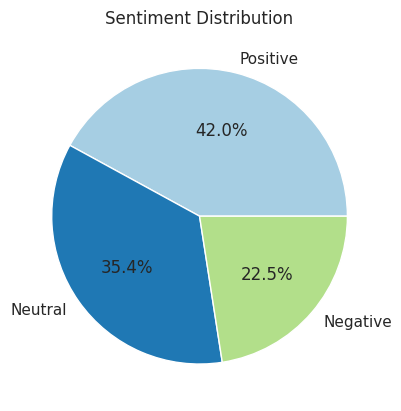

In [238]:
# Numărarea de revizuiri
sentiment_counts = df['Sentiment Label'].value_counts()

# Creează o paletă de culori pentru fiecare segment
colors = plt.cm.Paired(range(len(sentiment_counts)))

# Creează diagrama tip pie cu culori diferite
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.show()

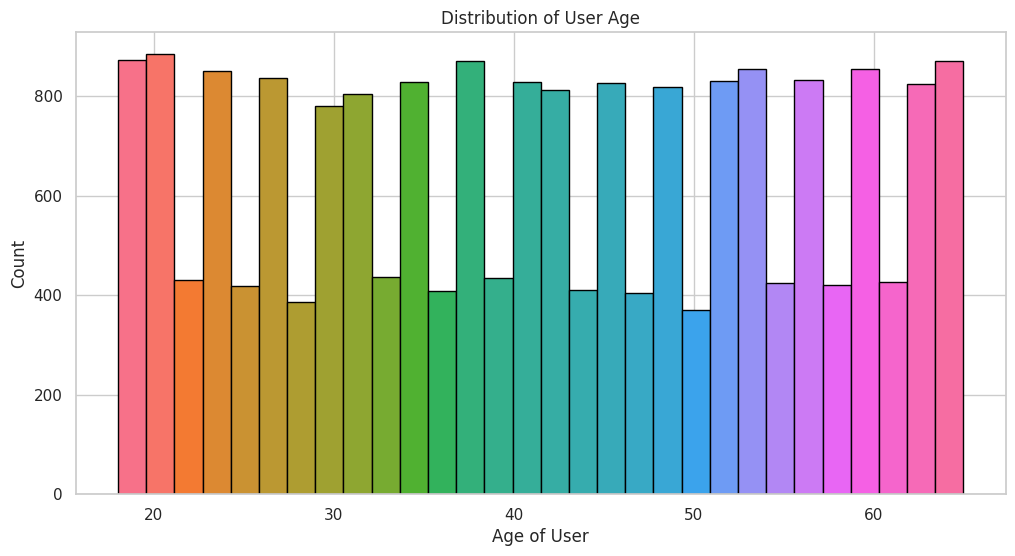

In [239]:
# Definirea unei palete de culori personalizate
palette = sns.color_palette("husl", 30)  # Schimbă 30 cu numărul de benzi dorit

# Plotează histograma cu culori diferite pentru fiecare bară
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['Age of User'], bins=30, edgecolor='black')

# Setează culoarea pentru fiecare bară
for i in range(len(patches)):
    patches[i].set_facecolor(palette[i])

plt.title('Distribution of User Age')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.show()

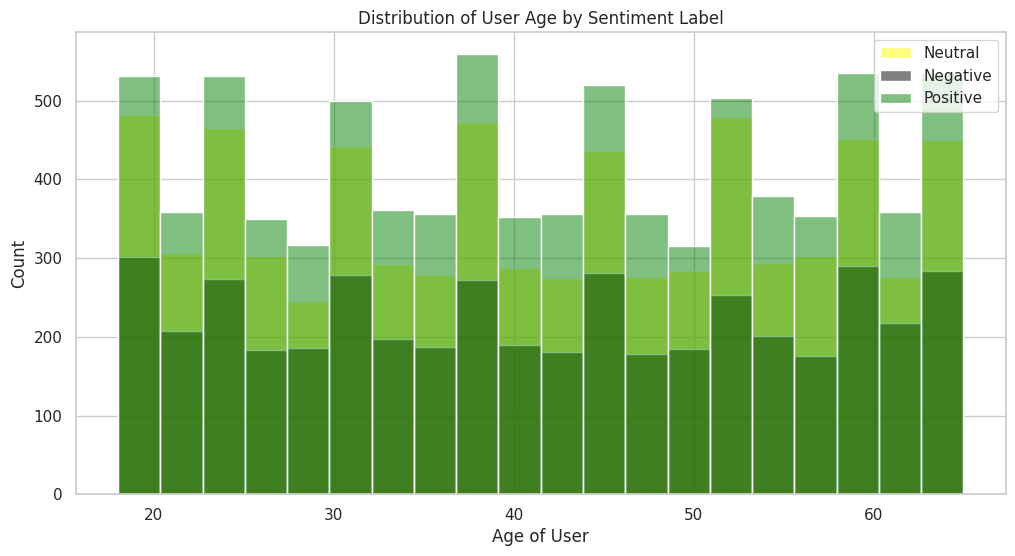

In [240]:
# Asigură-te că ai importat librăriile necesare și ai definit DataFrame-ul și coloanele corect

# Definește culorile pentru fiecare categorie de sentiment
colors = {'Neutral': 'yellow', 'Negative': 'black', 'Positive': 'green'}

# Plotează distribuția vârstelor pentru fiecare categorie de sentiment cu culori distincte
plt.figure(figsize=(12, 6))
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Neutral'], bins=20, color=colors['Neutral'], label='Neutral', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Negative'], bins=20, color=colors['Negative'], label='Negative', alpha=0.5)
sns.histplot(x='Age of User', data=df[df['Sentiment Label'] == 'Positive'], bins=20, color=colors['Positive'], label='Positive', alpha=0.5)

plt.title('Distribution of User Age by Sentiment Label')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend()
plt.show()

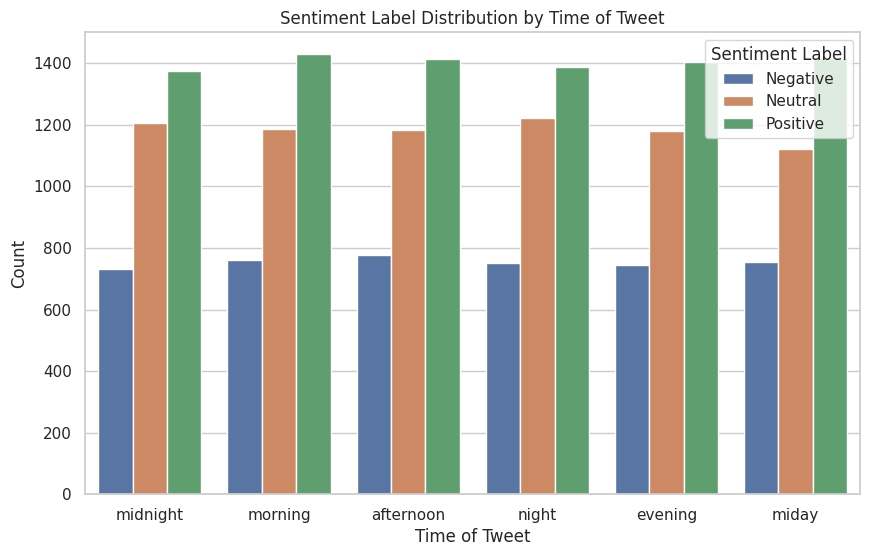

In [241]:
#Diagramă de tip Bar pentru Sentiment Label în funcție de Time of Tweet:
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='Sentiment Label', data=df)
plt.title('Sentiment Label Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()

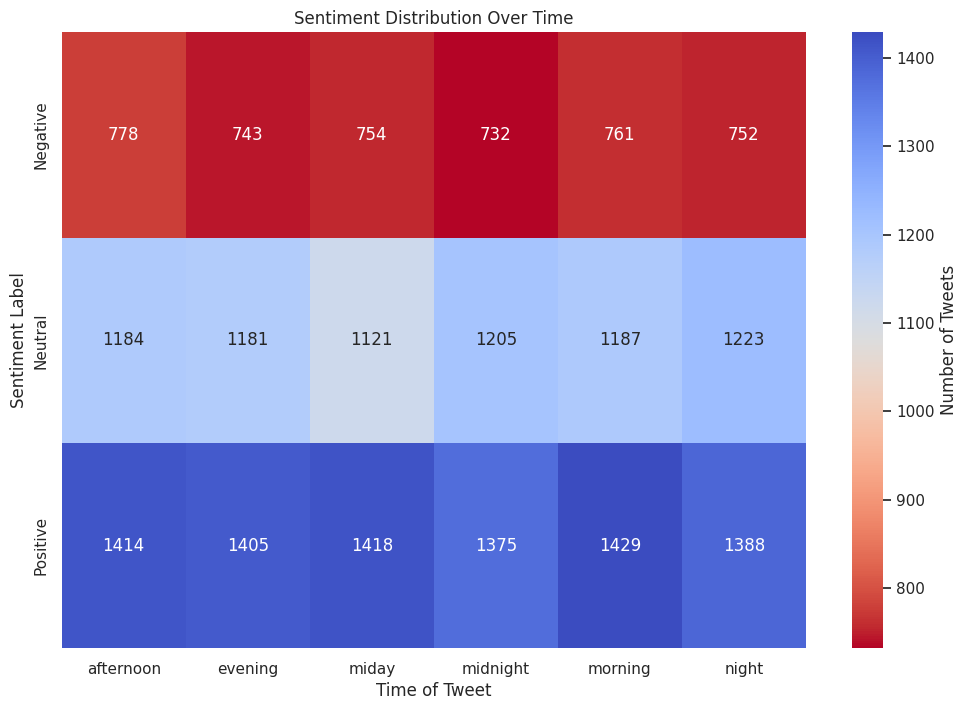

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creează o matrice de pivotare pentru a obține distribuția de sentimente în funcție de timp
heatmap_data = df.pivot_table(index='Sentiment Label', columns='Time of Tweet', aggfunc='size', fill_value=0)

# Configurează dimensiunea figurii
plt.figure(figsize=(12, 8))

# Plotează heatmap-ul utilizând Seaborn și inversează culorile cu "coolwarm_r"
sns.heatmap(heatmap_data, cmap='coolwarm_r', annot=True, fmt='d', cbar_kws={'label': 'Number of Tweets'})

# Adaugă titlul și etichetele pentru axe
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Label')

# Afișează heatmap-ul
plt.show()

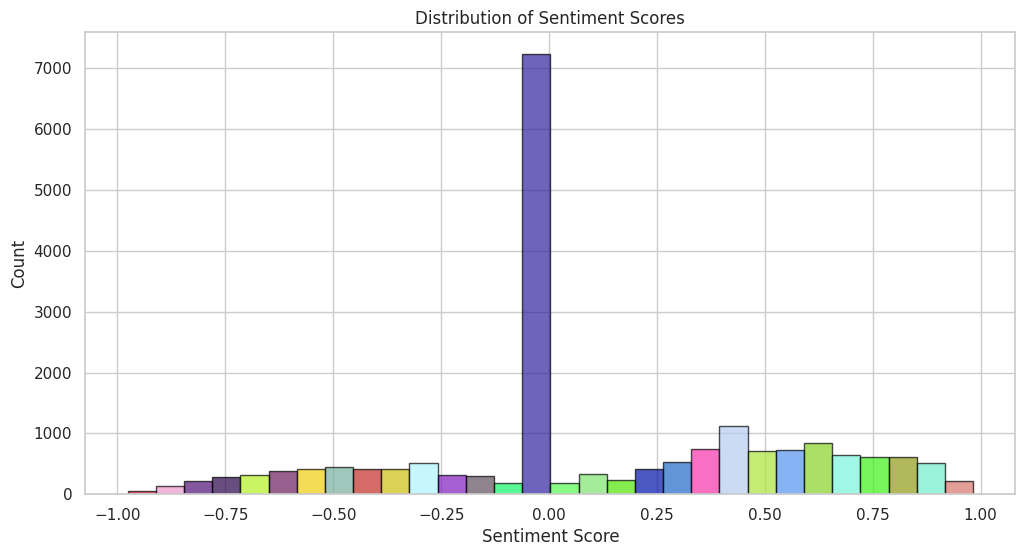

In [243]:
#Histogramă a Sentiment Score:
plt.figure(figsize=(12, 6))

num_bins = 30
colors = np.random.rand(num_bins, 3)  # Generează culori aleatorii RGB pentru fiecare bară
n, bins, patches = plt.hist(df['Sentiment Score'], bins=num_bins, edgecolor='black', alpha=0.7)

# Atribuie culori diferite pentru fiecare bin
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

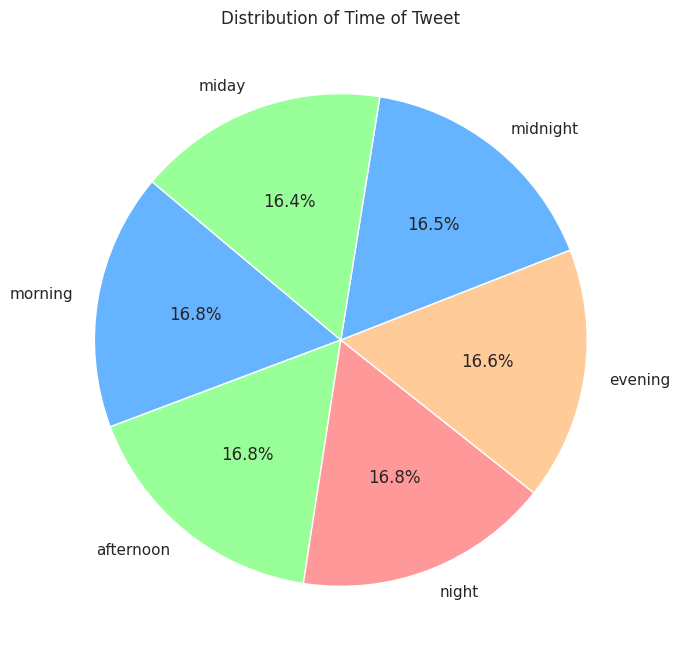

In [244]:
plt.figure(figsize=(8, 8))

# Calculează distribuția timpului tweet-urilor
time_counts = df['Time of Tweet'].value_counts()

# Calculează procentul pentru fiecare interval de timp
time_percentages = (time_counts / len(df['Time of Tweet'])) * 100

# Plotează diagrama circulară
plt.pie(time_percentages, labels=time_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999', '#ffcc99'])
plt.title('Distribution of Time of Tweet')

# Afișează diagrama
plt.show()

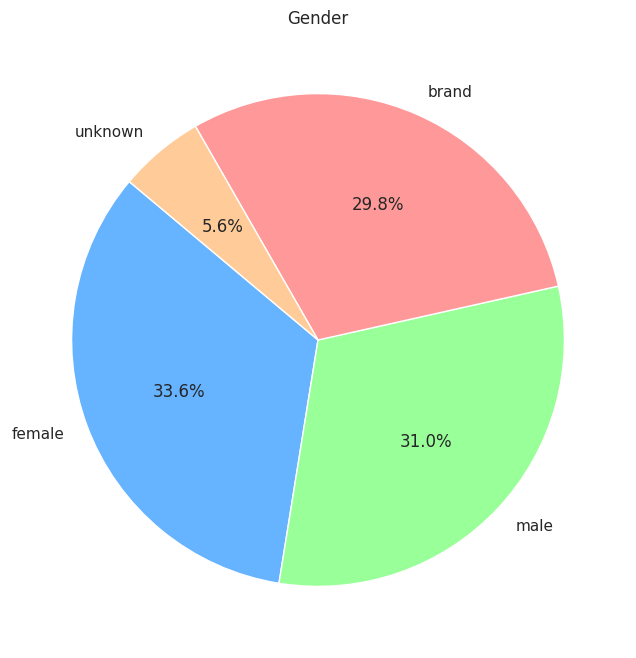

In [245]:
plt.figure(figsize=(8, 8))

# Calculează distribuția timpului tweet-urilor
time_counts = df['gender'].value_counts()

# Calculează procentul pentru fiecare interval de timp
time_percentages = (time_counts / len(df['gender'])) * 100

# Plotează diagrama circulară
plt.pie(time_percentages, labels=time_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ff9999', '#ffcc99'])
plt.title('Gender')

# Afișează diagrama
plt.show()

<Figure size 1200x800 with 0 Axes>

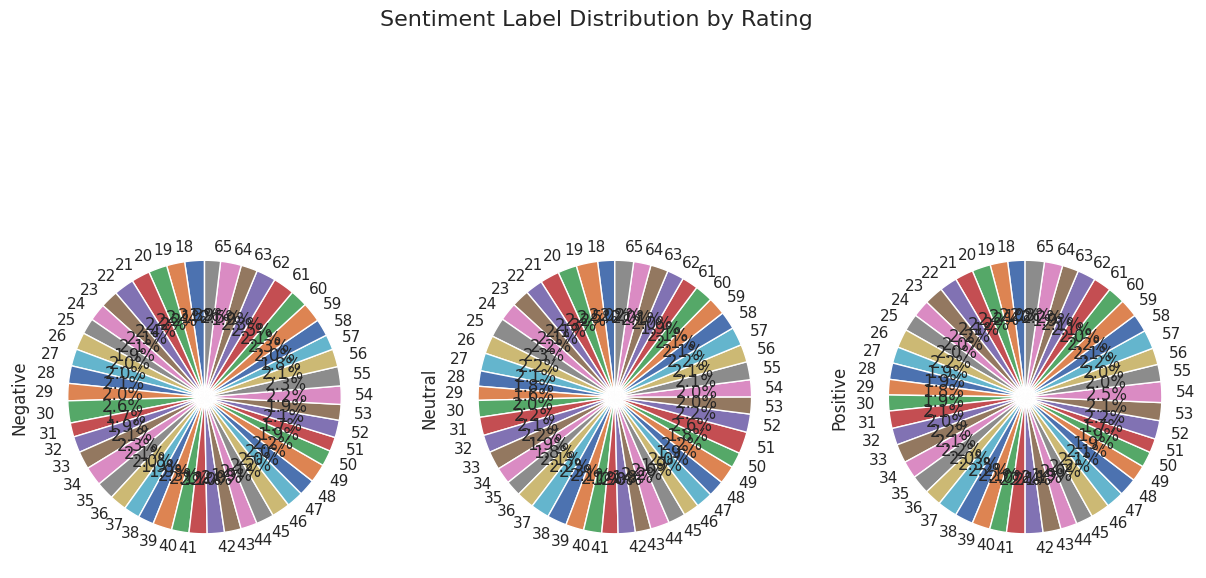

In [ ]:
plt.figure(figsize=(12, 8))
sentiment_by_rating = df.groupby(['Age of User', 'Sentiment Label']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, figsize=(15, 8), legend=False)
plt.suptitle('Sentiment Label Distribution by Rating', fontsize=16)
plt.show()

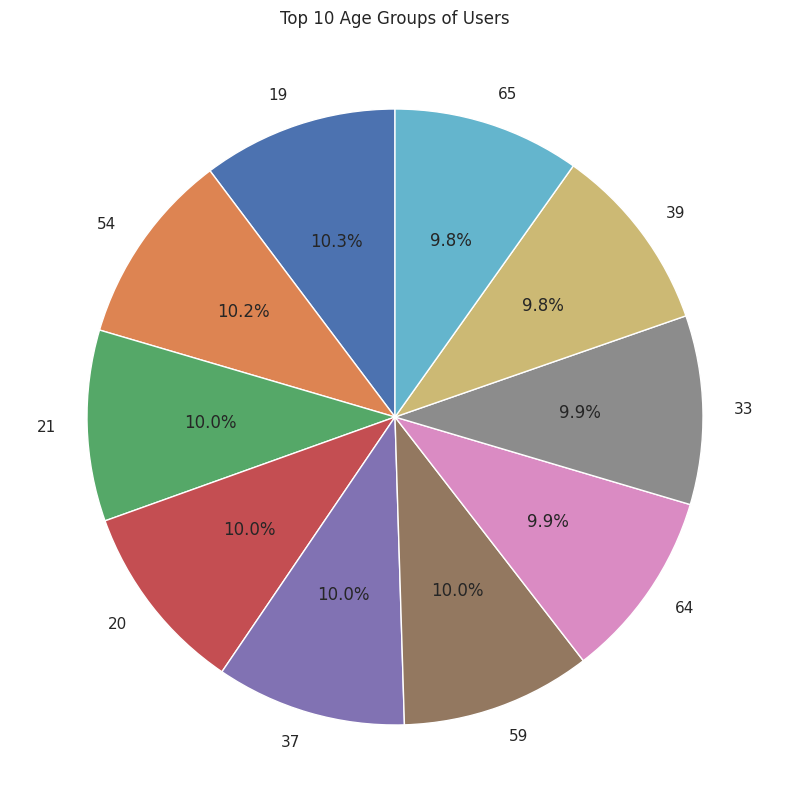

In [246]:
plt.figure(figsize=(10, 10))
age_counts = df['Age of User'].value_counts().nlargest(10)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Age Groups of Users')
plt.show()


In [95]:
pip install wordcloud

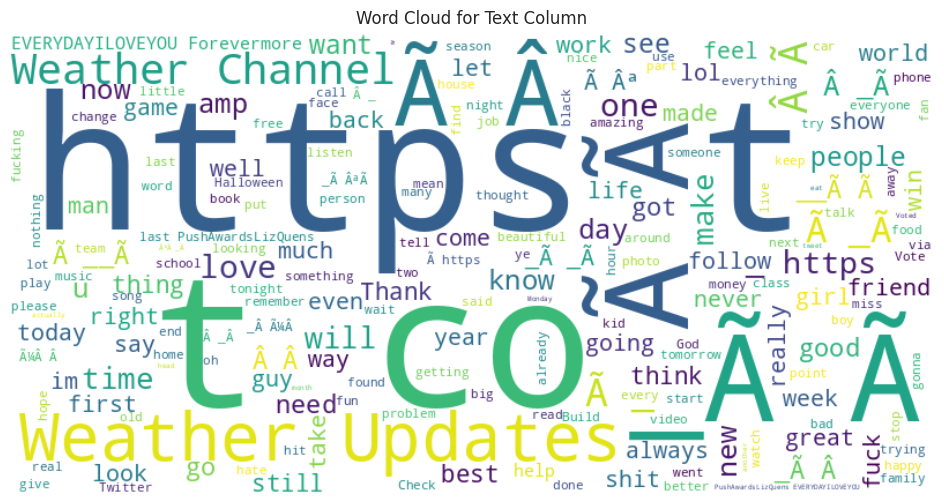

In [247]:
import pandas as pd
from wordcloud import WordCloud
# Asigură-te că ai inclus această linie
import matplotlib.pyplot as plt

# Citeste datele dintr-un fișier CSV
df = pd.read_csv("Data.csv", encoding='latin1')

# Continuă cu codul pentru Word Cloud
text_data = df['text'].dropna().str.cat(sep=' ')

# Creează un obiect WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plotează Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

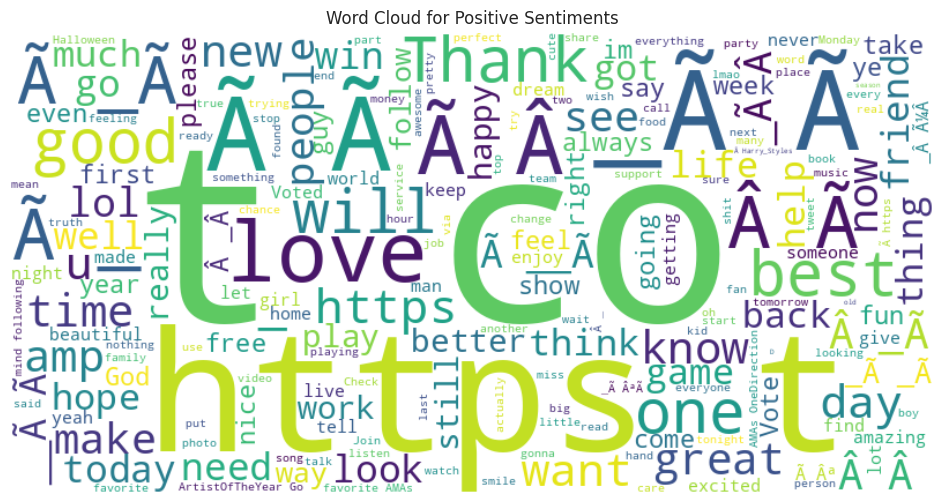

In [248]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Citeste datele dintr-un fișier CSV
df = pd.read_csv("Data.csv", encoding='ISO-8859-1')

# Filtrarea datelor pentru sentimentul pozitiv
positive_text_data = df[df['Sentiment Label'] == 'Positive']['text'].dropna().str.cat(sep=' ')

# Verifică dacă există text pentru sentimentul pozitiv
if len(positive_text_data) > 0:
    # Creează un obiect WordCloud pentru sentimentul pozitiv
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text_data)

    # Plotează Word Cloud pentru sentimentul pozitiv
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiments')
    plt.show()
else:
    print("Nu există text pentru sentimentul pozitiv.")

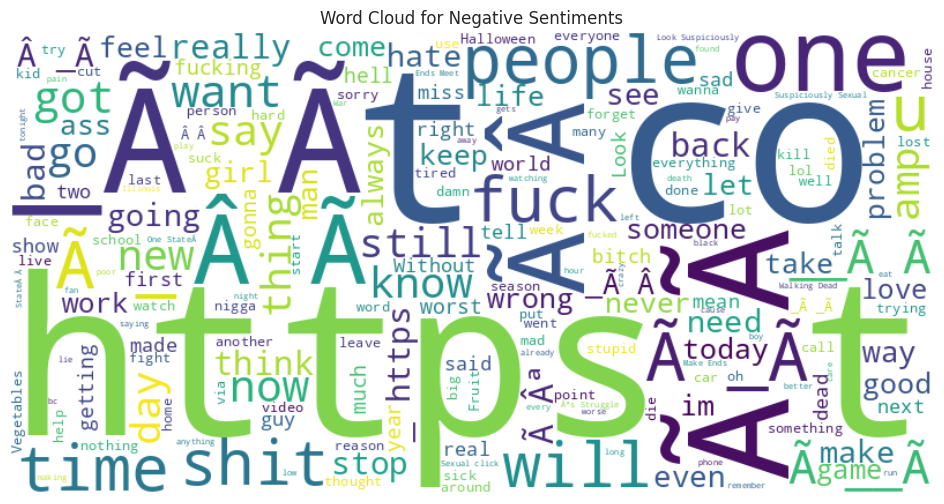

In [249]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul negativ
negative_text_data = df[df['Sentiment Label'] == 'Negative']['text'].dropna().str.cat(sep=' ')

# Verifică dacă există text pentru sentimentul negativ
if len(negative_text_data) > 0:
    # Creează un obiect WordCloud pentru sentimentul negativ
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text_data)

    # Plotează Word Cloud pentru sentimentul negativ
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Sentiments')
    plt.show()
else:
    print("Nu există text pentru sentimentul negativ.")

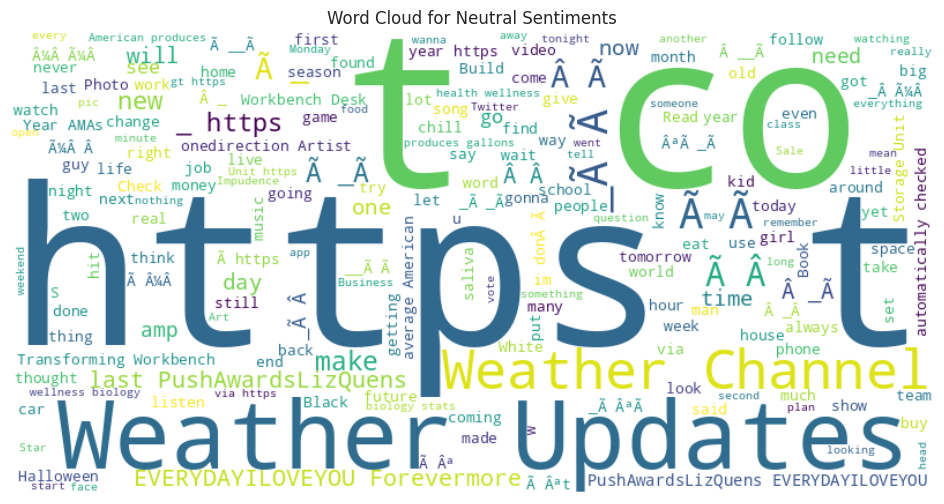

In [250]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrarea datelor pentru sentimentul neutru
neutral_text_data = df[df['Sentiment Label'] == 'Neutral']['text'].dropna().str.cat(sep=' ')

# Verifică dacă există text pentru sentimentul neutru
if len(neutral_text_data) > 0:
    # Creează un obiect WordCloud pentru sentimentul neutru
    wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text_data)

    # Plotează Word Cloud pentru sentimentul neutru
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Neutral Sentiments')
    plt.show()
else:
    print("Nu există text pentru sentimentul neutru.")